**Yongju Kim**  
CMSC 25025 Homework 1: Question 4  
Discussed this assignment with Hyun In Park.

Preliminary set-ups to carry out tasks in part (a)-(d):  

In [8]:
import numpy as np
import pylab as py
from sklearn.cluster import KMeans
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")


def plotting(kmeans, x):
    '''
    Creates a plot that represents datapoints and clustering analysis result.
    
    Input: kmeans object, x (dataset in numpy array)
    
    This function returns nothing, but displays the generated plot.
    '''
    
    cluster = kmeans.predict(x)
    fig = py.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(x[:,0], x[:,1], "o", color = "green")
    
    for i in range(3):
        
        col = [0, 0, 0, 1]
        col[i] = 1
        ax.plot(x[cluster == i, 0], x[cluster == i, 1], "o",
                mfc = (1, 1, 1, 0), mec = col, markersize = 10)
    
    ax.plot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            "o", color = "black", markersize = 15)

**Part (a)**  

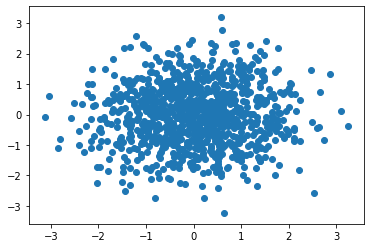

In [9]:
# Set random seed to avoid fluctuation between rounds of simulation
np.random.seed(409)

mu = (0, 0)
covar = [(1, 0), (0, 1)]

data = np.random.multivariate_normal(mu, covar, 1000)
py.scatter(data[:,0], data[:,1])

**Part (b)**  

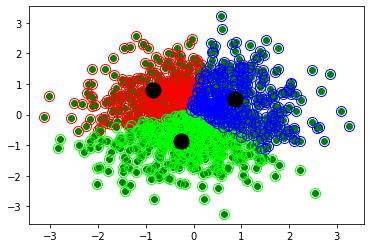

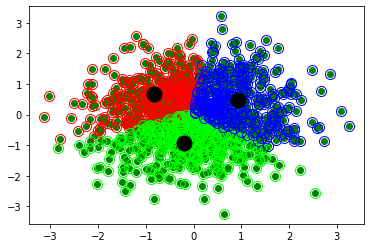

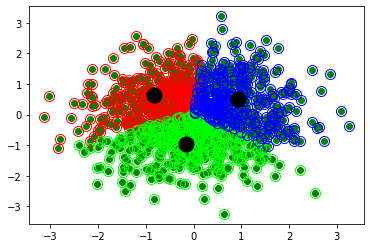

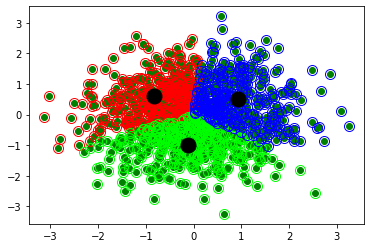

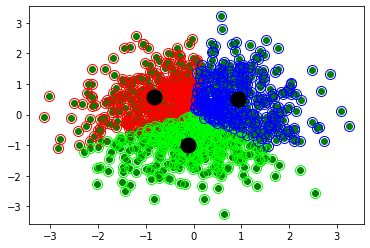

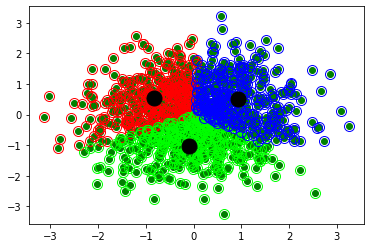

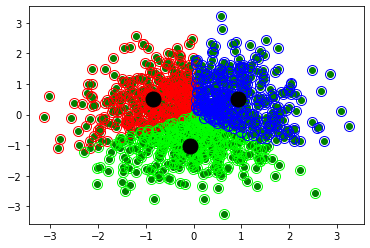

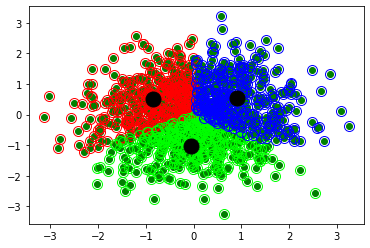

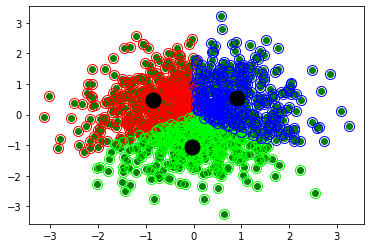

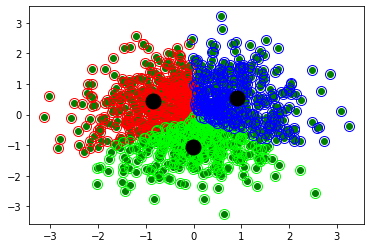

In [10]:
# Since shuffled the entire datapoints randomly, this is equivalent to
# random drawing of 3 initial cluster centers from the data
np.random.shuffle(data)
centers = data[:3]

# Number of iterration referenced referred to the diagonal_clusters example file
iterration = 10

for i in range(iterration):
    
    kmeans = KMeans(n_clusters = 3, init = centers, n_init = 1, max_iter = 1)
    kmeans.fit(data)
    plotting(kmeans, data)
    centers = kmeans.cluster_centers_

**Part (c)**  

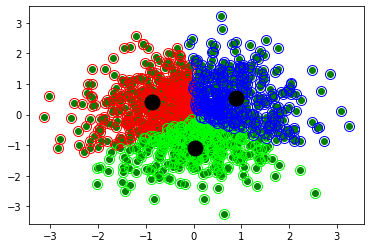

In [11]:
match = kmeans.predict(data)
group = np.array([kmeans.cluster_centers_[c] for c in match])
update = data * 0.99 + group * 0.01

for i in range(iterration):
    
    kmeans = KMeans(n_clusters = 3, init = centers, n_init = 1, max_iter = 1)
    kmeans.fit(update)
    centers = kmeans.cluster_centers_

#showing only the final plot after k-means iteration    
plotting(kmeans, data)

**Part (d)**  

Text(0.5, 1.0, 'After modification')

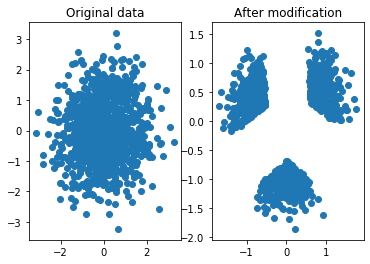

In [15]:
# Modifying data for 49 more times (already done once in part (c))
for i in range(49):
    
    new_group = kmeans.predict(update)
    update = update * 0.99 + kmeans.cluster_centers_[new_group] * 0.01
    
    for j in range(iterration):
        
        kmeans = KMeans(n_clusters = 3, init = centers, n_init = 1, max_iter = 1)
        kmeans.fit(update)
        centers = kmeans.cluster_centers_

fig, axs = py.subplots(1, 2)
axs[0].scatter(data[:,0], data[:,1])
axs[0].set_title("Original data")
axs[1].scatter(update[:,0], update[:,1])
axs[1].set_title("After modification")

After weekly modifications throughout one year, individuals (or their data) gathered more densely around their respective cluster centers, losing the diversity of the original data cloud. This shows that small indirect effect of choice of cluster has accumulated over an (simulated) year, resulting in significant difference.